## Линейная регрессия. Синтетические данные.

1. Создайте синтетический набор данных для решения задачи линейной регрессии. Количество объектов должно быть меньше 500, количество независимых признаков - 4 или больше, среди них 1 или 2 не должны влиять на  целевую переменную. Используйте функцию make_regression из sklearn. Задавайте random_state равным номеру зачётной книжки.

1. Исследуйте данные.
    - Изучите числовые характеристики всех признаков через 7-point summary. Используйте метод `describe()` класса pandas.DataFrame. Напишите пояснения для этих характеристик.
    - Постройте диаграммы размаха для всех признаков (seaborn.boxplot), скрипичные диаграммы (violinplot). Напишите пояснения. Есть ли выбросы?
    - Разберитесь как задать размер полотна (изображения) для графиков? Как построить несколько графиков, на одном полотне, но с разными осями? Постройте несколько диаграмм размаха
    - Постройте гистограмму для целевого признака. Используйте рекомендованное библиотекой число столбцов, задайте много столбцов. Опишите, как такая гистограмма устроена. Видны ли на гистограмме с большим количеством столбцов аномалии в данных?
    - Вычислите матрицу корреляции, сделайте для неё тепловую карту. Напишите, какие независимые признаки влияют на целевой сильнее всего? Есть ли математическая зависимость между независимыми признаками? Как это влияет на качество уравнения линейной регрессии?
    - **Постройте попарные дигаммы рассеяния (seaborn.pairplot). Что показывает такая диаграмма? Для какого распределения целевого признака предсказания уравнения линейной регрессии будут точнее всего? Постройте для этого признака отдельную диаграмму рассеяния (seaborn.jointplot).**
    - Дополнительно используйте пакет plotly для построения двухмерной и трёхмерной диаграммы рассеяния. На диаграмме должен быть целевой признак, и два наиболее значимых независимых признака.
    - Бонус: дополнительно постройте диаграммы на свой выбор.
1. **Обучите модель линейной регрессии**
1. Разделите исходные данные на выборку для обучения (train) и отложенную выборку (test) для проверки результатов обучения. Оцените качество модели на этих выборках. Почему результаты могут отличаться?
    - **Вычисляйте ошибку MSE, MAE.  Используйте встроенные в sklearn функции.**
    - Вычислите коэффициент детерминации R2. О чём он говорит?
    - upd: приведите функцию потерь, пояснения к ней. Зачем нужна эта функция?
1. **Напишите пояснения и комментарии к коду. Поясняйте общий алгоритм, смысл действий**, понятия (std, mean, ...) **параметры вызываемых функций**, записанные в коде формулы (приведите их в LaTeX). Комментарии к коду можно оставлять в ячейках с кодом, остальные пояснения можно давать в ячейках с текстом.

[Короткая шпаргалка по линейной регрессии](https://github.com/ivtipm/ML/blob/main/slides%20etc/linreg/ML_intro_linreg.png?raw=true)

7. Выполните оценку модели методом Cross Validation (CV). Разбивайте все данные на 5 частей. Вычислите средний R2.\
Запишите: отличается ли R2 на тестовой выборке, котоую вы сделали ранее, от полученной по CV. Объясните это.


## Создание синтетического набора данных

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression

In [24]:
random_state = 683583  

X, y = make_regression(
    n_samples=300,
    n_features=4,
    n_informative=2,
    noise=15,
    random_state=random_state
)

df = pd.DataFrame(X, columns=['x1', 'x2', 'x3', 'x4'])
df['target'] = y

df.head()
df.tail()


,x1,x2,x3,x4,target
295,0.087992,1.110495,-1.160541,-1.242955,102.700084
296,-0.553930,-1.247340,-0.952963,0.469470,-77.382536
297,-1.364219,-0.125492,0.054870,1.748028,-23.504275
298,0.241414,0.217399,-0.024414,-0.636140,25.660003
299,0.790938,0.711846,1.035943,-1.349394,68.345191


## Исследование данных

### 7-point summary через describe() 

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,300.0,-0.025112,1.045627,-2.750717,-0.737595,-0.039783,0.622953,2.613951
x2,300.0,0.072387,1.054796,-2.479570,-0.631729,0.016254,0.818423,3.449302
x3,300.0,0.056293,0.998639,-2.476742,-0.635387,0.056000,0.790029,2.606900
x4,300.0,-0.057029,0.948861,-2.868113,-0.636442,-0.015045,0.587520,2.519864
target,300.0,5.338443,72.685576,-190.831353,-41.336364,2.102976,52.773823,199.051028


std - standart deviation. показывкаает, как данные разбросанны

#### Boxplot и violinplot

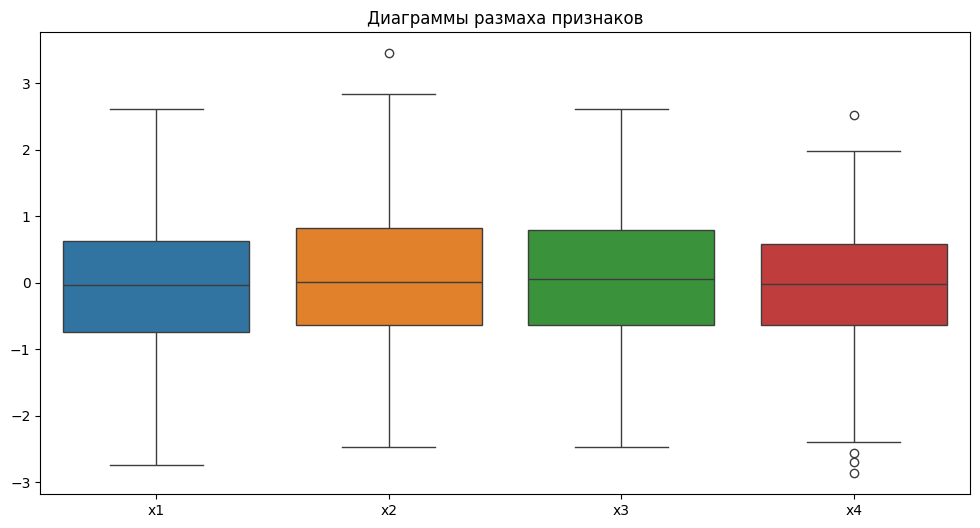

In [29]:
plt.figure(figsize=(12, 6))  # задаём размер полотна
sns.boxplot(data=df[['x1', 'x2', 'x3', 'x4']])
plt.title("Диаграммы размаха признаков")
plt.show()

Есть медиана, коробки называются IQR (interquartile range)
Внизу Q1, сверху - Q2

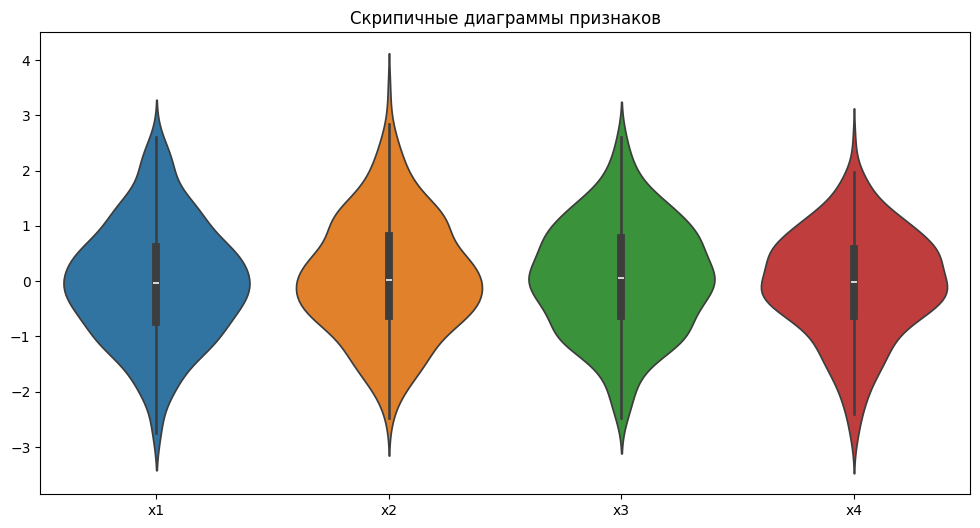

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[['x1', 'x2', 'x3', 'x4']])
plt.title("Скрипичные диаграммы признаков")
plt.show()


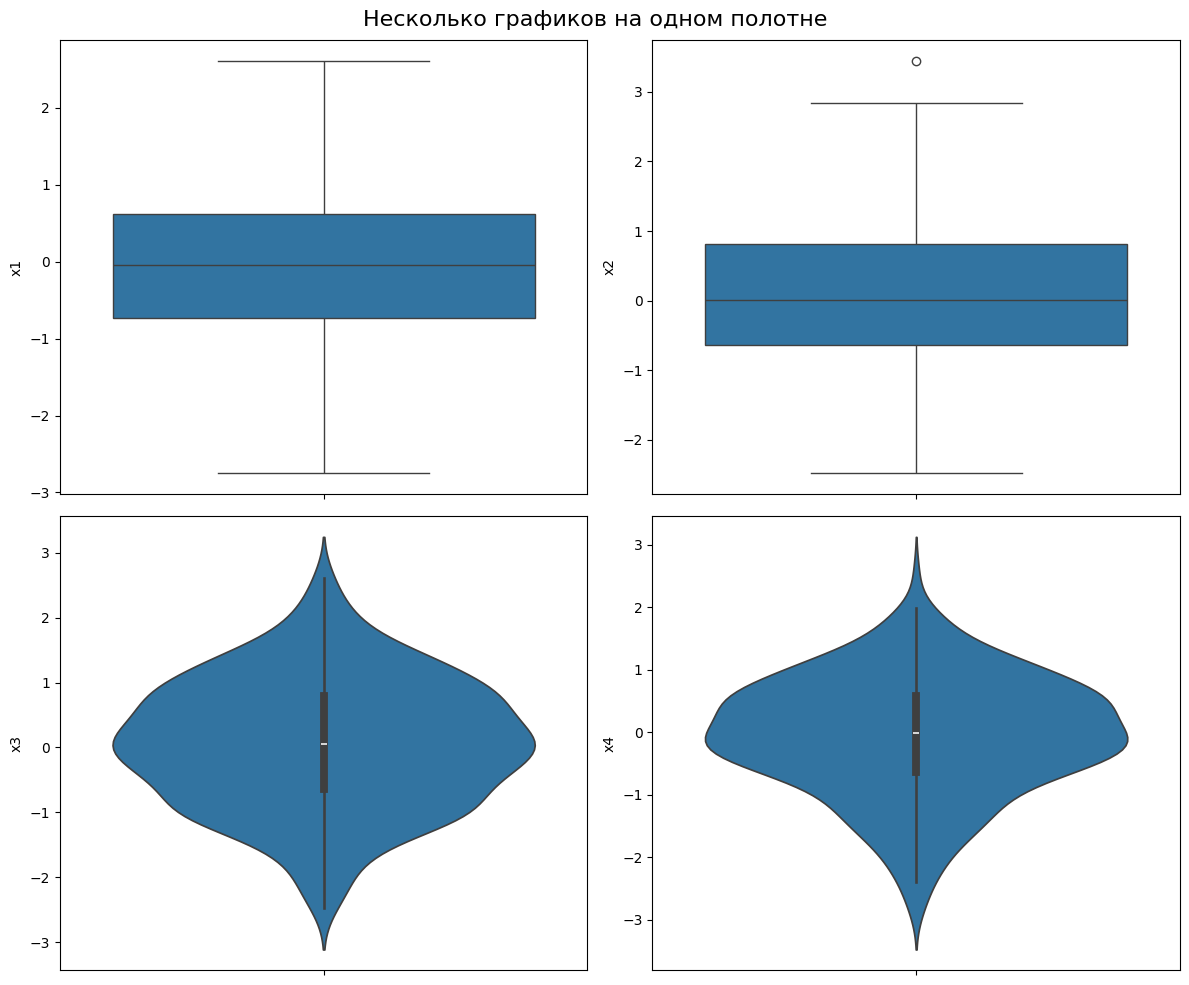

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(data=df['x1'], ax=axes[0,0])
sns.boxplot(data=df['x2'], ax=axes[0,1])
sns.violinplot(data=df['x3'], ax=axes[1,0])
sns.violinplot(data=df['x4'], ax=axes[1,1])

fig.suptitle("Несколько графиков на одном полотне", fontsize=16)
plt.tight_layout()
plt.show()


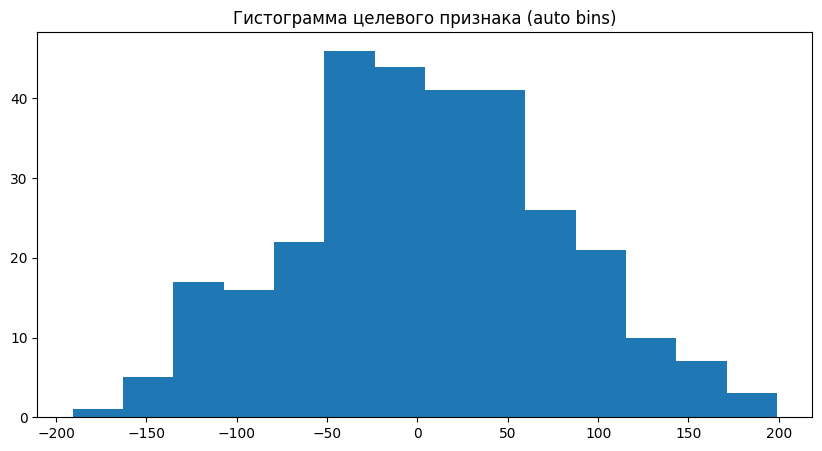

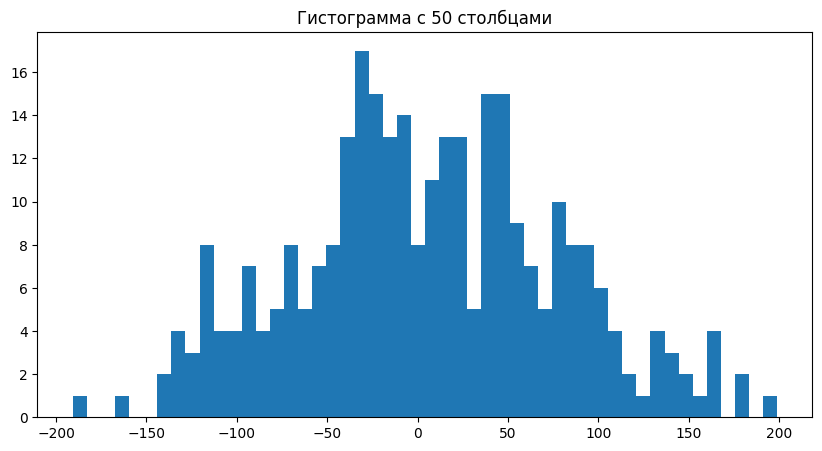

In [34]:
plt.figure(figsize=(10, 5))
plt.hist(df['target'], bins='auto')  # рекомендуемое число столбцов
plt.title("Гистограмма целевого признака (auto bins)")
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(df['target'], bins=50)  # много столбцов
plt.title("Гистограмма с 50 столбцами")
plt.show()


Высота - кол-во заначений в интервале\
Чем больше столбцов - тем более видны детали распределения\
Аномалии видны при 50 столбцах

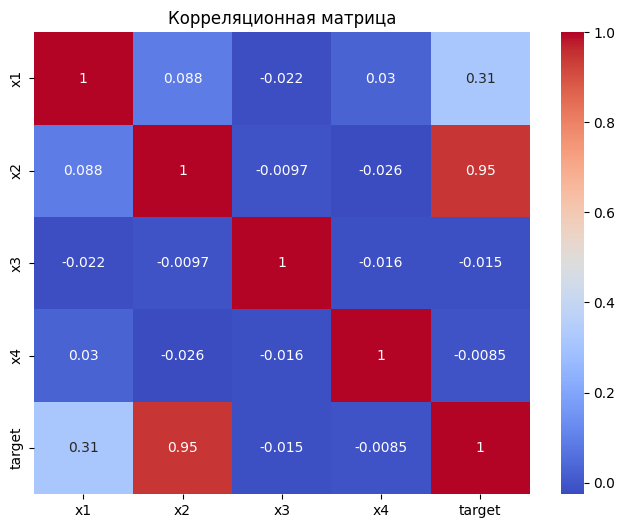

,x1,x2,x3,x4,target
x1,1.000000,0.088158,-0.021666,0.029615,0.314939
x2,0.088158,1.000000,-0.009708,-0.025926,0.946534
x3,-0.021666,-0.009708,1.000000,-0.015885,-0.014657
x4,0.029615,-0.025926,-0.015885,1.000000,-0.008531
target,0.314939,0.946534,-0.014657,-0.008531,1.000000


In [ ]:
plt.figure(figsize=(8, 6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Корреляционная матрица")
plt.show()


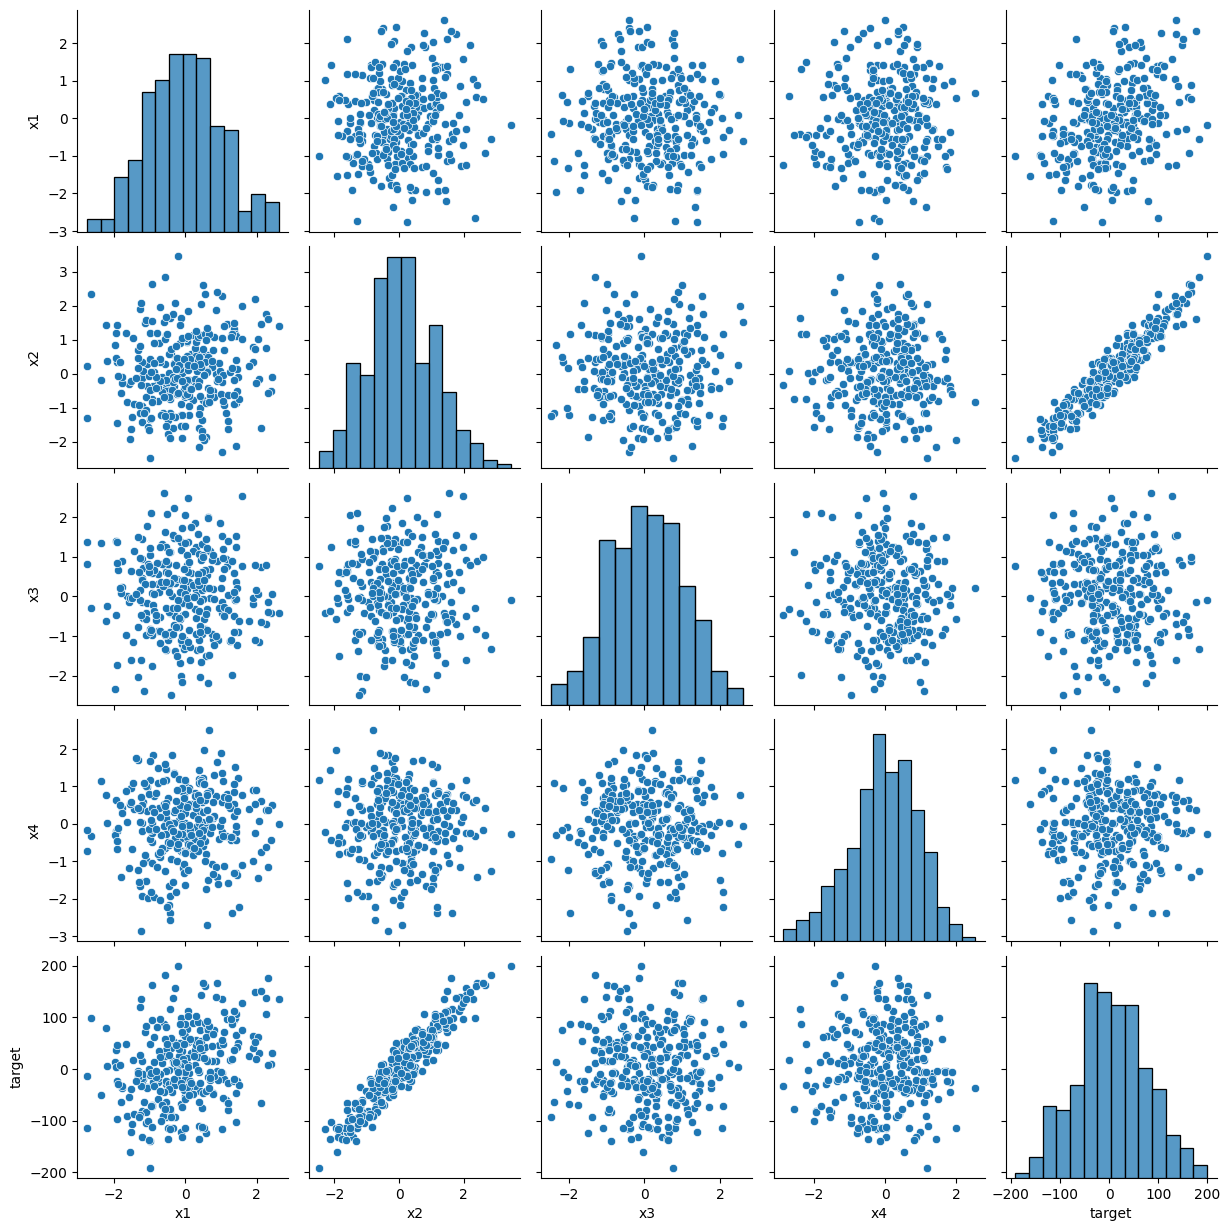

In [37]:
sns.pairplot(df)
plt.show()


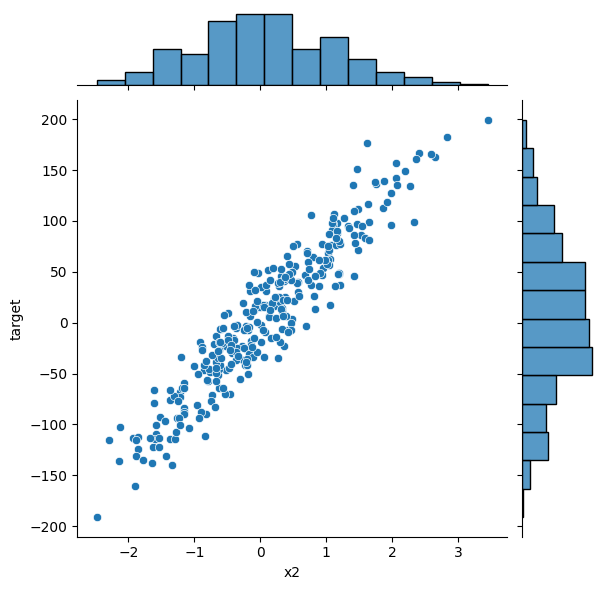

In [50]:
sns.jointplot(data=df, x='x2', y='target', kind='scatter')
plt.show()


In [ ]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "browser"

# 2D 
fig = px.scatter(df, x='x1', y='x2', color='target',
                 title="2D диаграмма рассеяния plotly")
# fig.show()

# 3D 
fig = px.scatter_3d(df, x='x1', y='x2', z='target', color='target',
                    title="3D диаграмма рассеяния plotly")
# fig.show()


## Обучение модели линейной регрессии

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random_state
)

model = LinearRegression()

Обучаем модель

In [59]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [65]:
# предсказания на тренировочных и тестовых выборках
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

### Вычисляем ошибки

**MSE - mean sqared error** - Среднеквадратичная ошибка

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
чем меньше - тем лучшее

---

**MAE - mean absolute error** - Средняя абсолютная ошибка

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

«в среднем модель ошибается на X единиц»

In [70]:
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

mse_train, mse_test, mae_train, mae_test

(253.7396594926796, 305.68252882118014, 12.875577030813865, 13.596059258505756)

**Коэффициент детерминации (R²)**

$$
R^2 = 1 - \frac{\sum (y_i - \hat y_i)^2}{\sum (y_i - \bar y)^2}
$$

R² показывает, **какую долю вариации целевой переменной объясняет модель**

* R² = 1 → идеальное предсказание
* R² = 0 → модель не лучше среднего
* R² < 0 → модель хуже, чем просто брать среднее


In [ ]:
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

r2_train, r2_test

(0.9506098013167477, 0.9469816501258637)

In [79]:
test_df = pd.DataFrame ()
test_df['Actual'] = y_test
test_df['Predicted'] = y_pred_test

test_df.head(10)

,Actual,Predicted
0,78.762496,56.390766
1,-7.498462,-9.233672
2,-3.532915,2.723548
3,6.151911,-10.806066
4,-93.084066,-106.476379
5,62.002082,100.543903
6,135.158025,134.121342
7,-3.612196,-38.824867
8,-131.467442,-111.051066
9,-24.653656,-21.479254


 **Функция потерь в линейной регрессии**
 
 Алгоритм ищет такие коэффициенты, которые минимизируют **MSE**

$$
\mathcal{L}(w, b) = \frac{1}{n} \sum_{i=1}^n (y_i - (w^\top x_i + b))^2
$$

Где:

* ( w ) — вектор коэффициентов
* ( b ) — свободный член
* ( x_i ) — признаки
* ( y_i ) — истинное значение

Задача алгоритма:

$$
\min_{w,b} \mathcal{L}(w, b)
$$

он ищет такие коэффициенты, которые **минимизируют квадрат ошибки**

## Cross Validation (5 fold)

In [ ]:
from sklearn.model_selection import cross_val_score


# scoring="r2" — метрика, которую считаем
# cv=5 — значит 5 фолдов
scores = cross_val_score(model, X, y, scoring="r2", cv=5)

print (f"R² для кажого фолда: {scores}, Среднее R²: {scores.mean()}")

ValueError: Format specifier missing precision